## Utility Functions

In [1]:
def remove_outliers(_df, _cols):
    for k in _cols:
        q1, q3 = _df[k].quantile(0.25), _df[k].quantile(0.75)
        iqr = q3 - q1

        lower_bound = max(0, q1 - (1.5 * iqr))
        upper_bound = q3 + (1.5 * iqr)
        _df = _df[(lower_bound < _df[k]) & (_df[k] <= upper_bound)]
        _df = _df.reset_index(drop=True)
    return _df

In [2]:
def preprocess(_df):
    # seperate OG
    _df['isBlueOG'] = _df.isBlueGoal & _df.isBlueConcede
    _df['isPurpleOG'] = _df.isPurpleGoal & _df.isPurpleConcede
    _df['isGreenOG'] = _df.isGreenGoal & _df.isGreenConcede

    _df['isBlueGoal'] = _df.isBlueGoal & ~_df.isBlueOG
    _df['isPurpleGoal'] = _df.isPurpleGoal & ~_df.isPurpleOG
    _df['isGreenGoal'] = _df.isGreenGoal & ~_df.isGreenOG
    
    # bool type -> int type
    for col in _df.columns:
        if _df[col].dtype == bool:
            _df[col] = _df[col].astype(int)
    return _df

In [3]:
import matplotlib.pyplot as plt
from math import pi

def plot_spider(_df, max_val, row, title, color):
    angles = [n / float(len(_df)) * 2 * pi for n in range(len(_df))]
    angles += angles[:1]
    
    ax = plt.subplot(3, 3, row+1, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw xlabels
    plt.xticks(angles[:-1], _df.keys(), color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    gaps = [i / 5 * max_val for i in range(5+1)]
    labels = [f"{gap:.2f}" for gap in gaps]
    plt.yticks(gaps, labels, color="grey", size=7)
    plt.ylim(0, max_val)
    
    # Ind1
    values = _df.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

In [4]:
columns = ['episodeLength', 'nAgentsPerGroup', 'nBlueTouch', 'nPurpleTouch', 'nGreenTouch', 'isBlueGoal', 'isPurpleGoal', 'isGreenGoal', 'isBlueConcede', 'isPurpleConcede', 'isGreenConcede']

## Random Test

In [5]:
import pandas as pd

file_path = "log_RD3.csv"
method = 'Random'

df = pd.read_csv(file_path, index_col=False, names=columns, header=None)
df = df.assign(category=[method for _ in range(len(df))])
df = preprocess(df)
df = remove_outliers(df, ['episodeLength'])
print(method, len(df))
df = df[:50000]

Random 54867


In [6]:
df.describe()

,episodeLength,nAgentsPerGroup,nBlueTouch,nPurpleTouch,nGreenTouch,isBlueGoal,isPurpleGoal,isGreenGoal,isBlueConcede,isPurpleConcede,isGreenConcede,isBlueOG,isPurpleOG,isGreenOG
count,50000.000000,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,3412.122360,4.0,4.988680,5.048640,4.993740,0.119080,0.121520,0.119140,0.181500,0.18616,0.185520,0.063600,0.065880,0.063960
std,1768.330301,0.0,4.350367,4.331389,4.328306,0.323886,0.326734,0.323956,0.385436,0.38924,0.388723,0.244041,0.248075,0.244684
min,48.000000,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1734.000000,4.0,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,4250.000000,4.0,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,5000.000000,4.0,7.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,5000.000000,4.0,40.000000,42.000000,41.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


## Comparison Vanilla vs ACL

In [7]:
file_paths = ["log_vanilla.csv", "log_with_acl.csv"]
methods = [file_path[4:-4] for file_path in file_paths]

In [8]:
import pandas as pd

dfs = list()
for idx, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path, index_col=False, names=columns, header=None)
    df = df.assign(category=[methods[idx] for _ in range(len(df))])
    df = preprocess(df)
    df = remove_outliers(df, ['episodeLength'])
    print(methods[idx], len(df))
    dfs.append(df[:50000])

dfs = pd.concat(dfs, ignore_index=True)
dfs

vanilla 56254
with_acl 54198


,episodeLength,nAgentsPerGroup,nBlueTouch,nPurpleTouch,nGreenTouch,isBlueGoal,isPurpleGoal,isGreenGoal,isBlueConcede,isPurpleConcede,isGreenConcede,category,isBlueOG,isPurpleOG,isGreenOG
0,535,4,18,0,2,0,0,0,1,0,0,vanilla,1,0,0
1,574,4,23,1,0,1,0,0,0,1,0,vanilla,0,0,0
2,240,4,10,0,0,1,0,0,0,0,1,vanilla,0,0,0
3,758,4,17,3,2,1,0,0,0,1,0,vanilla,0,0,0
4,1336,4,47,5,1,1,0,0,0,0,1,vanilla,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1692,4,16,1,1,1,0,0,0,1,0,with_acl,0,0,0
99996,1834,4,17,7,4,1,0,0,0,0,1,with_acl,0,0,0
99997,868,4,51,7,7,1,0,0,0,0,1,with_acl,0,0,0
99998,2534,4,85,1,4,1,0,0,0,1,0,with_acl,0,0,0


In [9]:
categorys = dfs.category.unique()
dfs[dfs.category == categorys[0]].describe()

,episodeLength,nAgentsPerGroup,nBlueTouch,nPurpleTouch,nGreenTouch,isBlueGoal,isPurpleGoal,isGreenGoal,isBlueConcede,isPurpleConcede,isGreenConcede,isBlueOG,isPurpleOG,isGreenOG
count,50000.000000,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,790.216380,4.0,25.985500,2.385060,2.671060,0.584000,0.041640,0.041560,0.265020,0.332000,0.402980,0.227040,0.045920,0.059840
std,604.848851,0.0,22.994436,3.268254,3.501763,0.492898,0.199767,0.199583,0.441348,0.470936,0.490502,0.418923,0.209314,0.237193
min,39.000000,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,308.750000,4.0,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,617.000000,4.0,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1128.000000,4.0,36.000000,3.000000,4.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2643.000000,4.0,248.000000,52.000000,54.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
categorys = dfs.category.unique()
dfs[dfs.category == categorys[1]].describe()

,episodeLength,nAgentsPerGroup,nBlueTouch,nPurpleTouch,nGreenTouch,isBlueGoal,isPurpleGoal,isGreenGoal,isBlueConcede,isPurpleConcede,isGreenConcede,isBlueOG,isPurpleOG,isGreenOG
count,50000.000000,50000.0,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,956.213420,4.0,19.955560,2.46206,2.970220,0.609380,0.048940,0.050480,0.217800,0.346860,0.435340,0.17388,0.048760,0.068560
std,758.891277,0.0,18.272626,3.37254,3.522758,0.487894,0.215745,0.218935,0.412755,0.475975,0.495806,0.37901,0.215368,0.252707
min,42.000000,4.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,356.000000,4.0,6.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,739.000000,4.0,14.000000,1.00000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1372.000000,4.0,28.000000,4.00000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000
max,3275.000000,4.0,163.000000,41.00000,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


[Text(0.5, 0, '')]

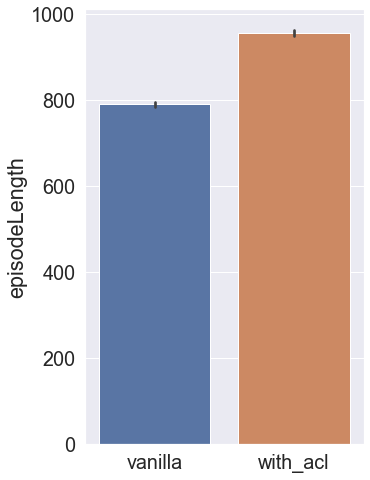

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# set font scale
sns.set(font_scale=1.8)

# draw figure
plt.figure(figsize=(5, 8))
ax = sns.barplot(
    data=dfs,
    x="category",
    y="episodeLength",
)
ax.set(xlabel="")

In [12]:
merged_df = pd.DataFrame(columns=dfs.category.unique())
for category in dfs.category.unique():
    for col in ["episodeLength", "nBlueTouch", "nPurpleTouch", "nGreenTouch"]:
        df = dfs[dfs.category == category]
        mean = df[col].mean()
        merged_df.append({category: mean}, ignore_index=True)
#         print(category, mean)
merged_df

C:\Users\sw980\AppData\Local\Temp\ipykernel_19968\2390752016.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df.append({category: mean}, ignore_index=True)
C:\Users\sw980\AppData\Local\Temp\ipykernel_19968\2390752016.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df.append({category: mean}, ignore_index=True)
C:\Users\sw980\AppData\Local\Temp\ipykernel_19968\2390752016.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df.append({category: mean}, ignore_index=True)
C:\Users\sw980\AppData\Local\Temp\ipykernel_19968\2390752016.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df.append({category: me

,vanilla,with_acl


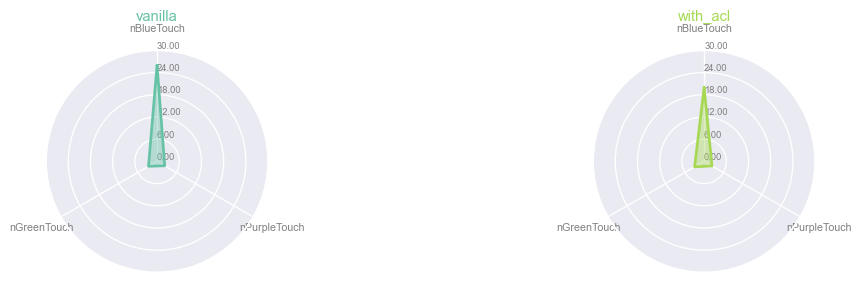

In [13]:
# set figure size
my_dpi = 96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

cols = ["nBlueTouch", "nPurpleTouch", "nGreenTouch"]
max_val = 30

# set color palette
my_palette = plt.cm.get_cmap("Set2", len(cols))

for idx, category in enumerate(dfs['category'].unique()):
    df = dfs[dfs.category == category]
    mean_df = df.mean(numeric_only=True)
    selected_df = mean_df[cols]
    
    plot_spider(selected_df, max_val=max_val, row=2*idx, title=f"{category}", color=my_palette(idx))

In [14]:
print(dfs[dfs.category == dfs.category.unique()[0]].mean(numeric_only=True)[cols])
print(dfs[dfs.category == dfs.category.unique()[1]].mean(numeric_only=True)[cols])

nBlueTouch      25.98550
nPurpleTouch     2.38506
nGreenTouch      2.67106
dtype: float64
nBlueTouch      19.95556
nPurpleTouch     2.46206
nGreenTouch      2.97022
dtype: float64


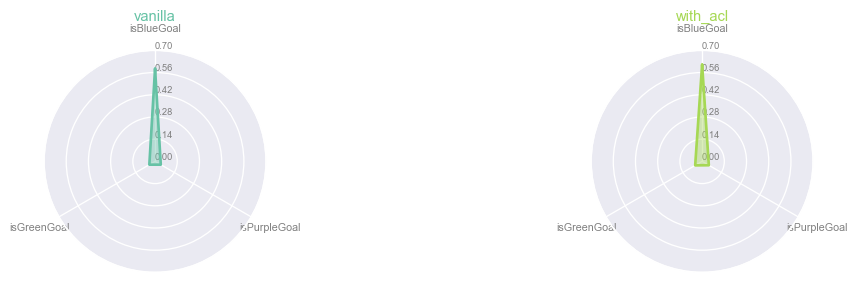

In [15]:
# set figure size
my_dpi = 96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

cols = ['isBlueGoal', 'isPurpleGoal', 'isGreenGoal']
max_val = .7

# set color palette
my_palette = plt.cm.get_cmap("Set2", len(cols))

for idx, category in enumerate(dfs['category'].unique()):
    df = dfs[dfs.category == category]
    mean_df = df.mean(numeric_only=True)
    selected_df = mean_df[cols]
    
    plot_spider(selected_df, max_val=max_val, row=2*idx, title=f"{category}", color=my_palette(idx))

In [16]:
print(dfs[dfs.category == dfs.category.unique()[0]].mean(numeric_only=True)[cols])
print(dfs[dfs.category == dfs.category.unique()[1]].mean(numeric_only=True)[cols])

isBlueGoal      0.58400
isPurpleGoal    0.04164
isGreenGoal     0.04156
dtype: float64
isBlueGoal      0.60938
isPurpleGoal    0.04894
isGreenGoal     0.05048
dtype: float64


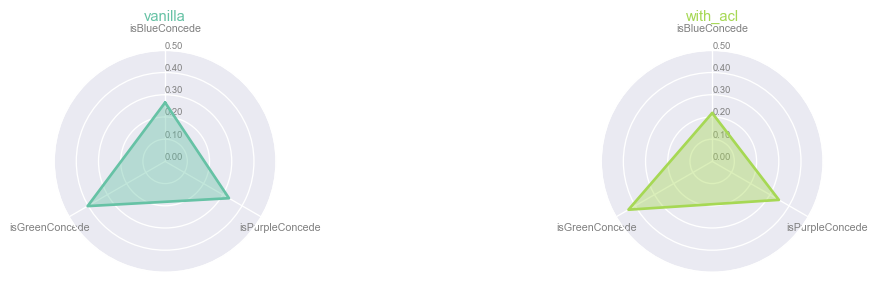

In [17]:
# set figure size
my_dpi = 96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

cols = ['isBlueConcede', 'isPurpleConcede', 'isGreenConcede']
max_val = .5

# set color palette
my_palette = plt.cm.get_cmap("Set2", len(cols))

for idx, category in enumerate(dfs['category'].unique()):
    df = dfs[dfs.category == category]
    mean_df = df.mean(numeric_only=True)
    selected_df = mean_df[cols]
    
    plot_spider(selected_df, max_val=max_val, row=2*idx, title=f"{category}", color=my_palette(idx))

In [22]:
print(dfs[dfs.category == dfs.category.unique()[0]].mean(numeric_only=True)[cols])
print(dfs[dfs.category == dfs.category.unique()[1]].mean(numeric_only=True)[cols])

isBlueConcede      0.26502
isPurpleConcede    0.33200
isGreenConcede     0.40298
dtype: float64
isBlueConcede      0.21780
isPurpleConcede    0.34686
isGreenConcede     0.43534
dtype: float64


### Stack Bar Plot

C:\Users\sw980\AppData\Local\Temp\ipykernel_19968\1170427669.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(mean, ignore_index=True)
C:\Users\sw980\AppData\Local\Temp\ipykernel_19968\1170427669.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(mean, ignore_index=True)


(array([0, 1]), [Text(0, 0, 'vanilla'), Text(1, 0, 'with_acl')])

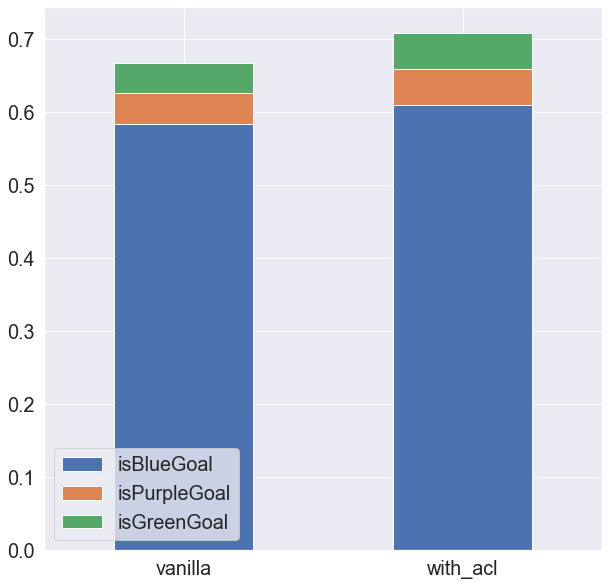

In [18]:
cols = ['isBlueGoal', 'isPurpleGoal', 'isGreenGoal']

# make dataframe
merged_df = list()
for idx, category in enumerate(dfs['category'].unique()):
    selected_df = dfs[dfs.category == category][cols]
    mean = selected_df.mean(numeric_only=True)
    new_df = pd.DataFrame(columns=mean.index)
    new_df = new_df.append(mean, ignore_index=True)
    merged_df.append(new_df)
merged_df = pd.concat(merged_df, ignore_index=True)
merged_df.index = dfs['category'].unique()

# draw plot
merged_df.plot(kind='bar', stacked=True, figsize=(10, 10))
plt.xticks(rotation=0)

C:\Users\sw980\AppData\Local\Temp\ipykernel_19968\3568395851.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(mean, ignore_index=True)
C:\Users\sw980\AppData\Local\Temp\ipykernel_19968\3568395851.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(mean, ignore_index=True)


(array([0, 1]), [Text(0, 0, 'vanilla'), Text(1, 0, 'with_acl')])

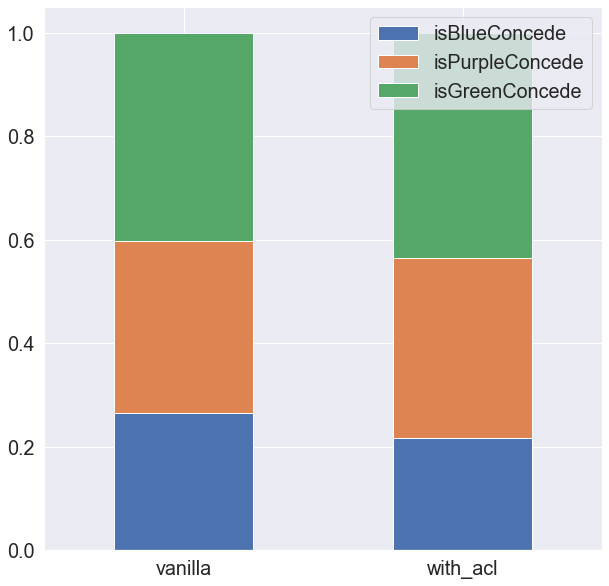

In [19]:
cols = ['isBlueConcede', 'isPurpleConcede', 'isGreenConcede']

# make dataframe
merged_df = list()
for idx, category in enumerate(dfs['category'].unique()):
    selected_df = dfs[dfs.category == category][cols]
    mean = selected_df.mean(numeric_only=True)
    new_df = pd.DataFrame(columns=mean.index)
    new_df = new_df.append(mean, ignore_index=True)
    merged_df.append(new_df)
merged_df = pd.concat(merged_df, ignore_index=True)
merged_df.index = dfs['category'].unique()

# draw plot
merged_df.plot(kind='bar', stacked=True, figsize=(10, 10))
plt.xticks(rotation=0)

## vanilla vs with_acl vs random

In [20]:
import pandas as pd

file_path = "log_FX1(B)_vs_CH1(P)_vs_RD1(G).csv"
method = 'Random'

df = pd.read_csv(file_path, index_col=False, names=columns, header=None)
df = df.assign(category=[method for _ in range(len(df))])
df = preprocess(df)
df = remove_outliers(df, ['episodeLength'])

In [21]:
df.describe()

,episodeLength,nAgentsPerGroup,nBlueTouch,nPurpleTouch,nGreenTouch,isBlueGoal,isPurpleGoal,isGreenGoal,isBlueConcede,isPurpleConcede,isGreenConcede,isBlueOG,isPurpleOG,isGreenOG
count,132072.000000,132072.0,132072.000000,132072.000000,132072.000000,132072.000000,132072.000000,132072.000000,132072.000000,132072.000000,132072.000000,132072.000000,132072.000000,132072.000000
mean,734.237325,4.0,19.314207,12.477951,2.646042,0.385986,0.259086,0.037737,0.279279,0.305212,0.415508,0.153765,0.101112,0.062314
std,548.078219,0.0,20.057835,13.074556,3.460319,0.486829,0.438135,0.190560,0.448647,0.460499,0.492811,0.360724,0.301477,0.241727
min,32.000000,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,302.000000,4.0,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,586.000000,4.0,13.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1045.000000,4.0,27.000000,17.000000,4.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2405.000000,4.0,233.000000,184.000000,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
